In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

In [4]:
!pwd

/content


# 1. Import/Load the neccessary **libraries**

In [0]:
# Keras imports for dataset and building your neural network model
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

# Imports for array handling and plotting purpose
from matplotlib import pyplot as plt
from keras.utils import np_utils

# **Part-I :** Data Preperation


## A. Loading dataset

In [0]:
(Img_train, Label_train),(Img_test, Label_test) = mnist.load_data()

In [0]:
Img_train.shape

## B. Data visualization (Optional) 

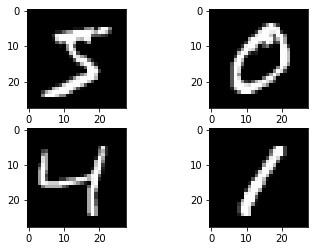

In [0]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(Img_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(Img_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(Img_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(Img_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## C. Reshaping the samples (Images) 

In [0]:
# Reshape to be [samples][width][height][channels] for TensorFlow backend or [channels][samples][width][height] for Theano
Img_train = Img_train.reshape((Img_train.shape[0], 28, 28, 1)).astype('float32')
Img_test = Img_test.reshape((Img_test.shape[0], 28, 28, 1)).astype('float32')

## D. Normalize inputs from 0-255 to 0-1

In [0]:
Img_train = Img_train / 255
Img_test = Img_test / 255

## E. Converting outputs into **one hot encode** outputs

In [0]:
Label_train = np_utils.to_categorical(Label_train)
Label_test = np_utils.to_categorical(Label_test)
num_classes = Label_test.shape[1]

# **Part II:** Model Preperation 

**A.** Define **Model** architecture

In [0]:
input_shape=(28,28,1)
num_classes=10
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation="softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

**B.** **Build (Compile)** the Model 

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

**C.** **Train (fit)** the Model

In [0]:
# Defining values for hyper parameters
batch_size= 100
epochs=20

# Training your model and saving the metrics in "hist"
hist=model.fit(Img_train, Label_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)  # validation_data=(Img_test, Label_test)

**D.** Save the model for further use 

In [0]:
# Saving the trained model
import os
os.mkdir("Results")
save_dir="Results/"
model_name='MyModel_MNIST.h5'
model_path=os.path.join(save_dir, model_name)
model.save(model_path)

# **Part III:** Performance Analysis

**A.** Visualising model's performance during training

In [0]:
# Plotting the metrics
fig=plt.figure()
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc='upper right')

#plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(['Train','Test'],loc='upper right')
plt.tight_layout()

**B.**  **Evaluating** the model- Check prediction score for test dataset 

In [0]:
myTrained_model=keras.models.load_model('Results/MyModel_MNIST.h5')
score = myTrained_model.evaluate(Img_test, Label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.020341028370661932
Test accuracy: 0.994


**C.** Let us see which images were predicted wrongly



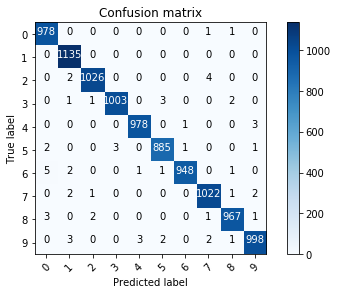

In [0]:
# Look at confusion matrix 
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(Img_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Label_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [0]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = Img_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols) #,sharex=True,sharey=True)
    plt.tight_layout()
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            ax.set_xticks([])
            ax.set_yticks([])
            plt.tight_layout()
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
